<a href="https://colab.research.google.com/github/nafanur/clustering-kecamatan-DKI-Jakarta-CRM-2024/blob/main/T5_A_10060122030_Nafa_Nurhanifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nafa Nurhanifah

10060122030

Tugas 5 Praktikum Data Mining (clustering)

In [124]:
# Install dan import Library yang dibutuhkan
# !pip install -q gdown # buat upload  dri gdrive
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering # buat dendogram
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns

In [125]:
from google.colab import drive

In [126]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
#Siapkan Data
# Link unduhan langsung dari Google Drive
url = 'https://drive.google.com/uc?id=1RgDmj4kqFYcdusUBBVxPkhLMJ9AsTmXO'
# Nama file data
data = 'datacrm2024.csv'
# Unduh file
gdown.download(url, data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RgDmj4kqFYcdusUBBVxPkhLMJ9AsTmXO
To: /content/datacrm2024.csv
100%|██████████| 1.68k/1.68k [00:00<00:00, 822kB/s]


'datacrm2024.csv'

In [128]:
# Baca file jika berupa CSV
data = pd.read_csv(data, delimiter=";")
data.head()

,No,Kecamatan DKI Jakarta,Parkir Liar 2024,Arus Lalu Lintas 2024,Jalan 2024
0,1,KECAMATAN CEMPAKA PUTIH,293,72,269
1,2,KECAMATAN GAMBIR,584,269,722
2,3,KECAMATAN JOHAR BARU,130,19,144
3,4,KECAMATAN KEMAYORAN,599,300,327
4,5,KECAMATAN MENTENG,589,143,549


# **Hierarchical Clustering**

In [129]:
#Pilih fitur yang akan digunakan sebagai dasar pengelompokkan
# kolom ke 3 sampai terakhir jadi variabel bebas (fitur) nya
X=data.iloc[:, 2:]
X.head()

,Parkir Liar 2024,Arus Lalu Lintas 2024,Jalan 2024
0,293,72,269
1,584,269,722
2,130,19,144
3,599,300,327
4,589,143,549


In [130]:
# Hitung Matrix jarak
# pemilihan jarak disesuaikan dgn eksplorasi awal (apakah ada outlier atau tidak)
# klo gk ada outlier, pake jarak euclidean
distance_matrix = pairwise_distances(X, metric='euclidean')

In [131]:
#Tampilkan matriks jarak sebagai DataFrame
distance_data = pd.DataFrame(distance_matrix)
print("Matriks Jarak (Euclidean):")
display(distance_data)

Matriks Jarak (Euclidean):


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.000000,573.322771,212.139105,385.984456,413.590377,109.343495,414.021739,670.445374,387.548707,245.668476,...,168.389430,682.188390,726.102610,711.602417,137.869504,131.639660,83.743656,450.763796,402.892045,404.043315
1,573.322771,0.000000,776.337555,396.498424,214.079425,529.712186,483.595906,118.346948,424.128518,520.755221,...,419.151524,154.654454,278.556996,446.977628,667.708769,504.981188,581.998282,171.029237,965.306687,966.521598
2,212.139105,776.337555,0.000000,576.550952,624.565449,253.288373,598.445486,872.716449,511.575019,338.995575,...,359.271485,877.953302,937.032550,914.521186,125.199840,328.916403,201.231210,653.026033,193.455421,194.833262
3,385.984456,396.498424,576.550952,0.000000,272.090059,407.818587,235.384791,442.688378,543.188733,498.137531,...,343.317637,547.358201,489.192191,439.552045,486.185150,267.441582,447.482961,371.122621,744.597878,745.071138
4,413.590377,214.079425,624.565449,272.090059,0.000000,403.931925,290.191316,312.931302,403.852696,442.364103,...,289.043249,327.722444,314.861874,369.498309,532.632143,326.677211,439.083136,114.459600,816.442895,817.609931
5,109.343495,529.712186,253.288373,407.818587,403.931925,0.000000,473.905054,626.422381,291.756748,139.846344,...,117.927944,630.194414,717.744383,738.859933,143.735869,199.251098,73.979727,417.315229,438.595486,439.939769
6,414.021739,483.595906,598.445486,235.384791,290.191316,473.905054,0.000000,551.573205,620.353125,579.714585,...,403.639691,605.323880,469.860618,342.447076,544.299550,287.890604,480.896039,399.637336,767.507655,768.133452
7,670.445374,118.346948,872.716449,442.688378,312.931302,626.422381,551.573205,0.000000,521.654100,617.279515,...,520.889624,189.044968,285.611624,465.844395,759.953288,595.464525,683.280323,288.175294,1058.357690,1059.451745
8,387.548707,424.128518,511.575019,543.188733,403.852696,291.756748,620.353125,521.654100,0.000000,181.077332,...,250.912335,460.683188,656.427452,770.215554,414.383880,431.519409,332.882862,336.157701,679.436531,681.152699
9,245.668476,520.755221,338.995575,498.137531,442.364103,139.846344,579.714585,617.279515,181.077332,0.000000,...,177.262517,596.422669,740.470121,803.734409,237.892833,327.835325,180.870119,419.104999,504.187465,505.788493


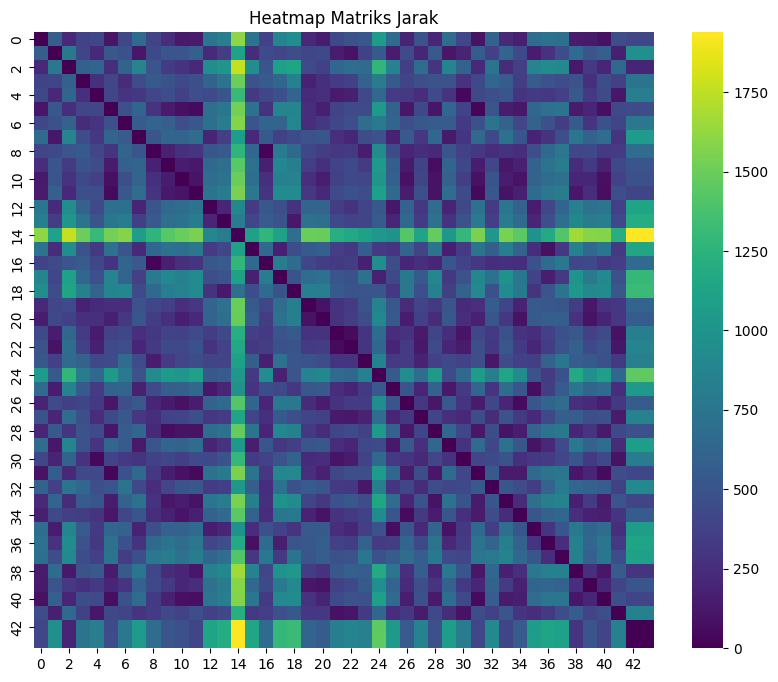

In [132]:
# Visualisasi matriks jarak dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_data, cmap='viridis')
plt.title("Heatmap Matriks Jarak")
plt.show()

# interpretasi: objek yg makin pekat semakin mirip/mendekat antar objek nya.
# Ini bisa digunakan untuk penentuan klaster nya
# data yg berjumlah sangat banyak itu kurang cocok dgn hirearical aglomerative

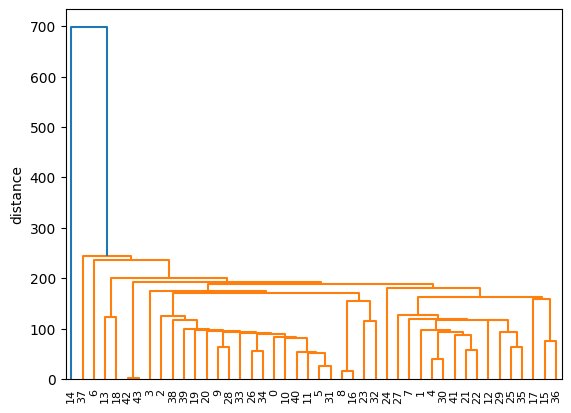

In [133]:
#Bangun Dendogram dengan single linkage
linkage_matrix=sch.linkage(X,method="single")
dendogram=sch.dendrogram(linkage_matrix) # bikin dendogram dri matriks linkage nya
plt.ylabel("distance")
plt.savefig("dendogram single.png",dpi=300)

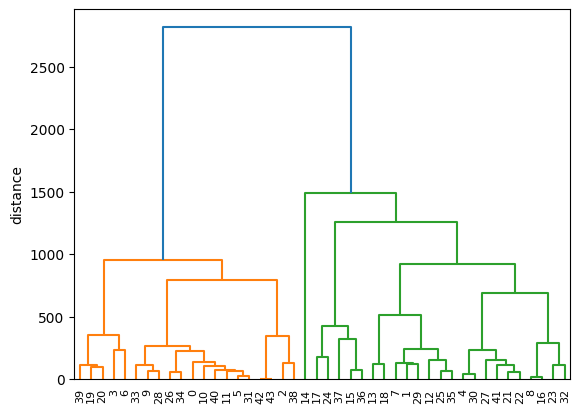

In [134]:
#Bangun Dendogram dengan ward linkage
linkage_matrix=sch.linkage(X,method="ward")
dendogram=sch.dendrogram(linkage_matrix) # bikin dendogram dri matriks linkage nya
plt.ylabel("distance")
plt.savefig("dendogram ward.png",dpi=300)

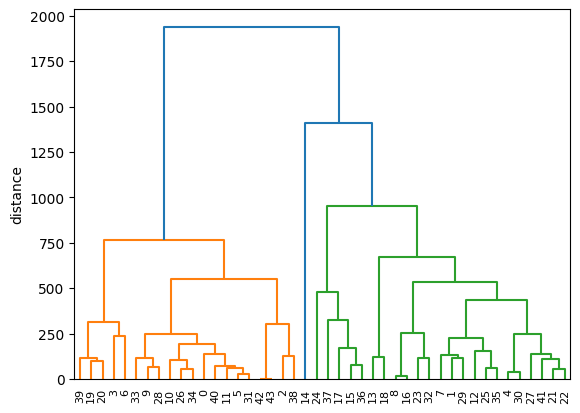

In [135]:
#Bangun Dendogram dengan complete linkage
linkage_matrix=sch.linkage(X,method="complete")
dendogram=sch.dendrogram(linkage_matrix) # bikin dendogram dri matriks linkage nya
plt.ylabel("distance")
plt.savefig("dendogram complete.png",dpi=300)

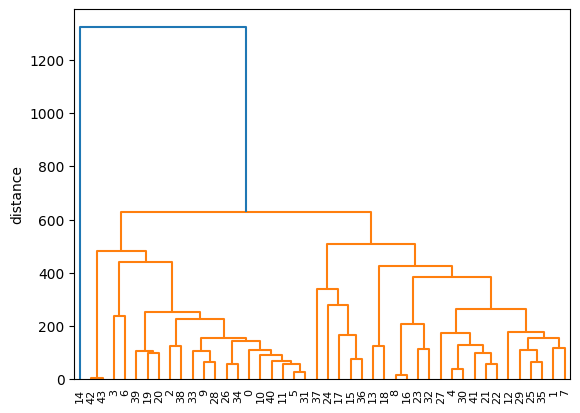

In [136]:
#Bangun Dendogram dengan average linkage
linkage_matrix=sch.linkage(X,method="average")
dendogram=sch.dendrogram(linkage_matrix) # bikin dendogram dri matriks linkage nya
plt.ylabel("distance")
plt.savefig("dendogram average.png",dpi=300)

In [137]:
#Tentukan banyaknya kluster (k) yang diinginkan dan lakukan clustering sesuai dengan jarak dan metode linkage yang digunakan
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward') # linkage nya bisa diubah2 (single, complete, average, ward)
cluster.fit(X)
cluster.labels_

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

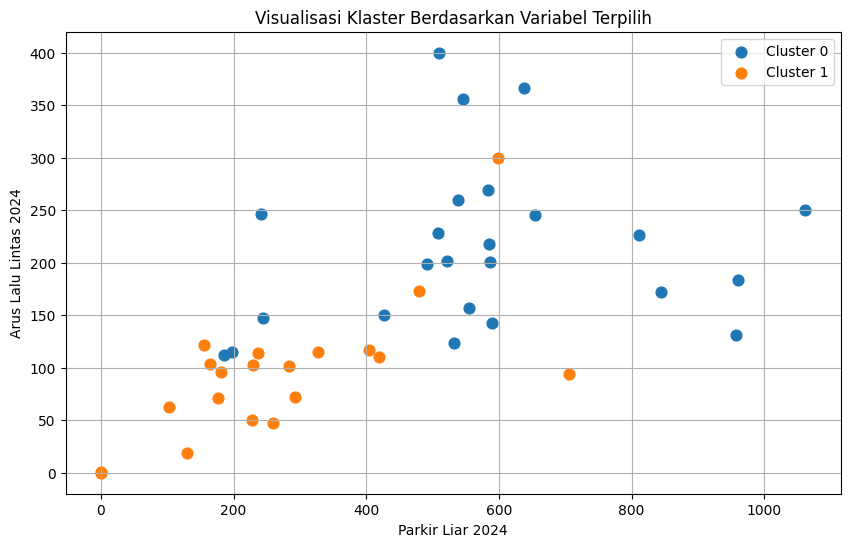

In [138]:
# visualisasi hasil klaster
xvar = "Parkir Liar 2024"
yvar = "Arus Lalu Lintas 2024"

plt.figure(figsize=(10,6))
for i in range(cluster.n_clusters_):
    plt.scatter(
        data.loc[cluster.labels_ == i, xvar],
        data.loc[cluster.labels_ == i, yvar],
        s=60,
        label=f'Cluster {i}'
    )

plt.title('Visualisasi Klaster Berdasarkan Variabel Terpilih')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.legend()
plt.grid(True)
plt.show()

# interpretasi dgn ward linkage: dgn ward linkage, pengelompokan kecamatan nya lebih baik dibandingkan dengan linkage yg lain.
# Cluster 0 (Warna Biru): Tinggi Parkir Liar & Tinggi Lalu Lintas & Cluster 1 (Warna Oranye): Rendah Parkir Liar & Lalu Lintas Lebih Lancar
# Cluster 0: kecamatan yang memiliki tingkat parkir liar dan arus lalu lintas yang tinggi, sehingga perlu menjadi prioritas pengawasan & penertiban parkir liar.
# Cluster 1: kecamatan dengan aktivitas lalu lintas lebih rendah, sehingga relatif lebih kondusif & tidak memerlukan intensitas pengawasan sebesar klaster 0.

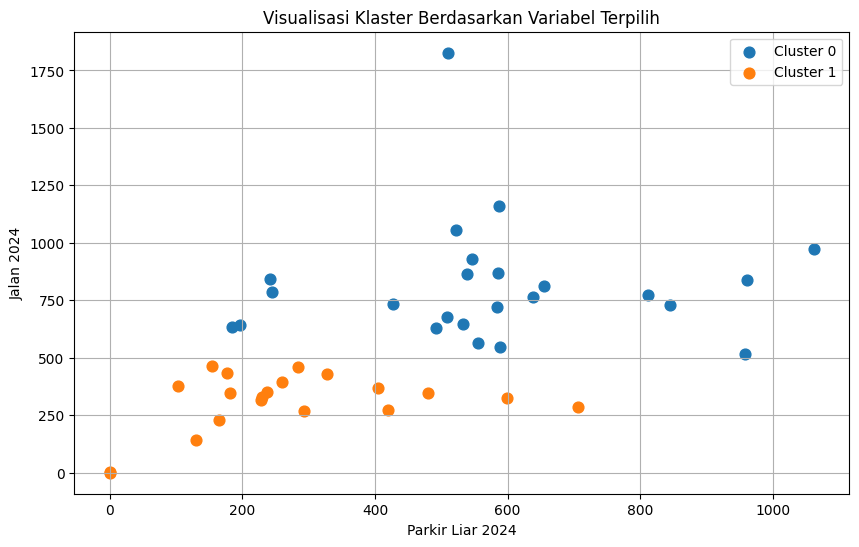

In [139]:
# visualisasi hasil klaster
xvar = "Parkir Liar 2024"
yvar = "Jalan 2024"

plt.figure(figsize=(10,6))
for i in range(cluster.n_clusters_):
    plt.scatter(
        data.loc[cluster.labels_ == i, xvar],
        data.loc[cluster.labels_ == i, yvar],
        s=60,
        label=f'Cluster {i}'
    )

plt.title('Visualisasi Klaster Berdasarkan Variabel Terpilih')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.legend()
plt.grid(True)
plt.show()

# Cluster 0 (Biru): Kecamatan dengan Parkir Liar Tinggi & Jalan Lebar/Banyak
# Cluster 1 (Oranye): Kecamatan dengan Parkir Liar Rendah & Jalan Lebih Sedikit
# Klaster biru menunjukkan kecamatan berisiko tinggi terkait parkir liar karena ukuran wilayah dan jaringan jalan yang besar.
# Klaster oranye menunjukkan kecamatan risiko rendah, dengan lingkungan yang lebih mudah dikelola.

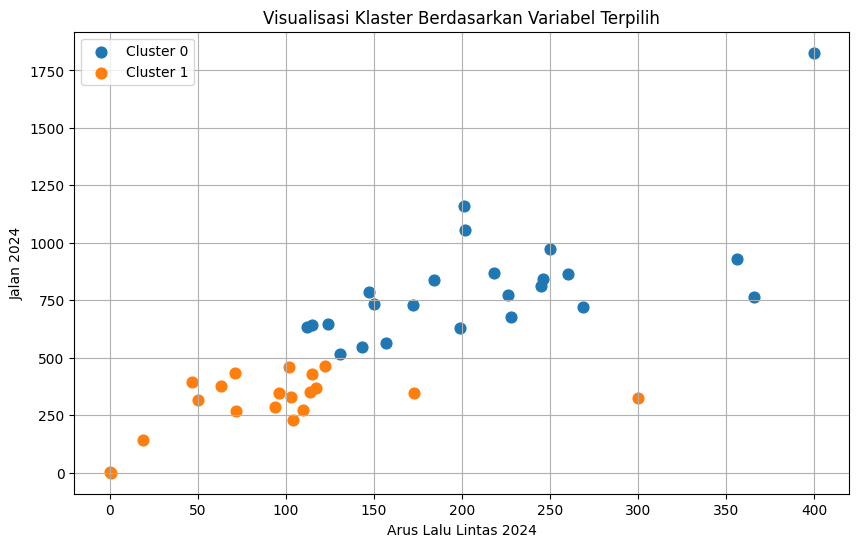

In [140]:
# visualisasi hasil klaster
xvar = "Arus Lalu Lintas 2024"
yvar = "Jalan 2024"

plt.figure(figsize=(10,6))
for i in range(cluster.n_clusters_):
    plt.scatter(
        data.loc[cluster.labels_ == i, xvar],
        data.loc[cluster.labels_ == i, yvar],
        s=60,
        label=f'Cluster {i}'
    )

plt.title('Visualisasi Klaster Berdasarkan Variabel Terpilih')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.legend()
plt.grid(True)
plt.show()
# Cluster 0 (warna biru) umumnya berisi kecamatan yang memiliki arus lalu lintas tinggi & jumlah permasalahan jalan yang besar. Kecamatan pada klaster ini cenderung berada di area dengan mobilitas yang padat, volume kendaraan besar, dan tingkat kerusakan/keluhan jalan yang lebih tinggi
# semakin tinggi arus lalu lintas, semakin besar pula potensi peningkatan keluhan atau permasalahan terkait jalan

penentuan metode mana (single, complete, average, ward) yg terbaik: sesuai dgn penelitian & apakah ada outlier (diatasi dulu otlier nya atau bisa pilih yg lebih robust outlier)

In [141]:
#Simpan data hasil clustering dalam format Excel
# data.to_excel("Agglomerative_Clustering_crm.xlsx",sheet_name="Agglomerative",index=False)

In [142]:
#import library yang dibutuhkan
from sklearn.metrics import silhouette_score

In [143]:
# Rentang nilai k
range_n_clusters=range(2,10) # klaster nya dri 2 sampe 10
silhouette_scores =[]

In [144]:
# Menghitung Silhouette Coefficient untuk setiap k
for n_clusters in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels=cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Jumlah cluster: {n_clusters}, Average Silhouette Coefficient: {silhouette_avg:.3f}')

# nilai Silhouette yg tertinggi adalah dgn jumlah klaster 3
# namun hasil dari 3 klaster ada klaster yang isinya hanya 1 kecamatan saja
# jadi tetap memilih 2 klaster saja

Jumlah cluster: 2, Average Silhouette Coefficient: 0.430
Jumlah cluster: 3, Average Silhouette Coefficient: 0.434
Jumlah cluster: 4, Average Silhouette Coefficient: 0.402
Jumlah cluster: 5, Average Silhouette Coefficient: 0.333
Jumlah cluster: 6, Average Silhouette Coefficient: 0.353
Jumlah cluster: 7, Average Silhouette Coefficient: 0.366
Jumlah cluster: 8, Average Silhouette Coefficient: 0.405
Jumlah cluster: 9, Average Silhouette Coefficient: 0.420


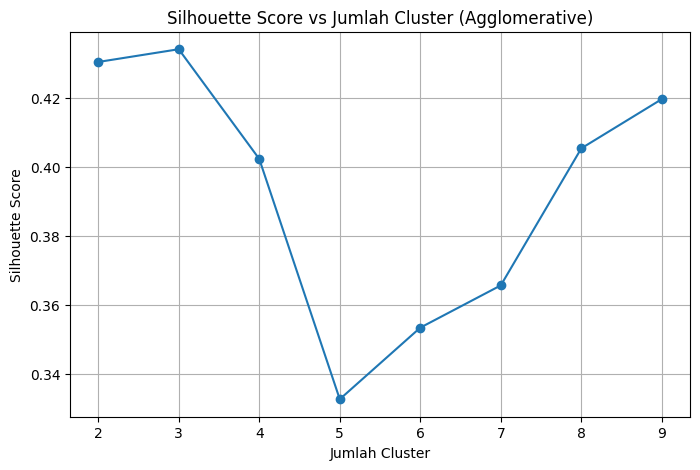

In [145]:
# Memplot hasil Silhouette
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Jumlah Cluster (Agglomerative)")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [146]:
# Import Library yang dibutuhkan
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
# Rentang nilai k
range_n_clusters = range(2, 10)
ch_indices = []
# Menghitung Calinski–Harabasz Index untuk setiap k
for n_clusters in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels=cluster.fit_predict(X)
    ch_index = calinski_harabasz_score(X, labels)
    ch_indices.append(ch_index)
    print(f'Jumlah cluster: {n_clusters}, Calinski–Harabasz Index: {ch_index:.3f}')

# CHI diambil nilai CHI yg tertinggi: ada di jumlah klaster 7,9,8
# liat kondisi data nya, klo data pelanggan sebaiknya dgn pengelompokkan yg minimum nya saja, gk usah banyak2 jumlah klasternya
# jdi diliat dari tertinggi yg pertama saja yaitu jumlah klaster nya 5

Jumlah cluster: 2, Calinski–Harabasz Index: 41.206
Jumlah cluster: 3, Calinski–Harabasz Index: 35.493
Jumlah cluster: 4, Calinski–Harabasz Index: 36.404
Jumlah cluster: 5, Calinski–Harabasz Index: 36.393
Jumlah cluster: 6, Calinski–Harabasz Index: 40.494
Jumlah cluster: 7, Calinski–Harabasz Index: 45.793
Jumlah cluster: 8, Calinski–Harabasz Index: 52.579
Jumlah cluster: 9, Calinski–Harabasz Index: 55.940


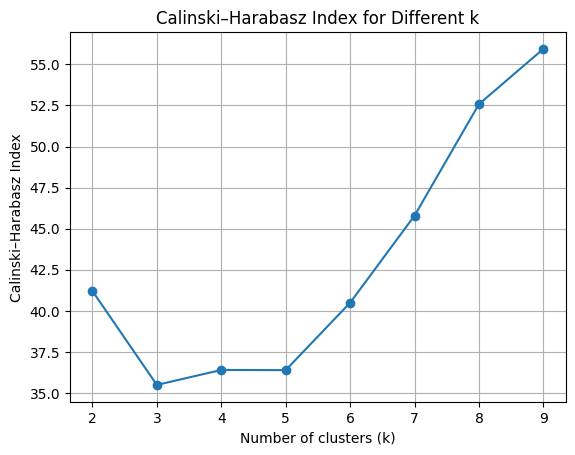

In [147]:
plt.plot(range_n_clusters, ch_indices, marker='o')
plt.title("Calinski–Harabasz Index for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski–Harabasz Index")
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# **Non-Hierarchical Clustering (K-Means)**

In [148]:
#Import Library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [149]:
#Pilih fitur yang akan digunakan sebagai dasar pengelompokkan
X=data.iloc[:,2:] # pilih variabel bebas nya
X.head()

,Parkir Liar 2024,Arus Lalu Lintas 2024,Jalan 2024
0,293,72,269
1,584,269,722
2,130,19,144
3,599,300,327
4,589,143,549


## penentuan k-optimal

In [150]:
#Penentuan K Optimal Menggunakan Silhouette Coefficient
# Rentang nilai k
range_n_clusters = range(2, 10)
silhouette_avgs =[]

# Menghitung Silhouette Coefficient untuk setiap k
for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, labels)
  silhouette_avgs.append(silhouette_avg)
  print(f'Jumlah cluster: {n_clusters}, Average Silhouette Coefficient: {silhouette_avg:.3f}')

# interpretasi: paling tinggi nya di jumlah klaster nya 2, beda dengan Hierarchical

Jumlah cluster: 2, Average Silhouette Coefficient: 0.454
Jumlah cluster: 3, Average Silhouette Coefficient: 0.406
Jumlah cluster: 4, Average Silhouette Coefficient: 0.417
Jumlah cluster: 5, Average Silhouette Coefficient: 0.383
Jumlah cluster: 6, Average Silhouette Coefficient: 0.376
Jumlah cluster: 7, Average Silhouette Coefficient: 0.347
Jumlah cluster: 8, Average Silhouette Coefficient: 0.366
Jumlah cluster: 9, Average Silhouette Coefficient: 0.406


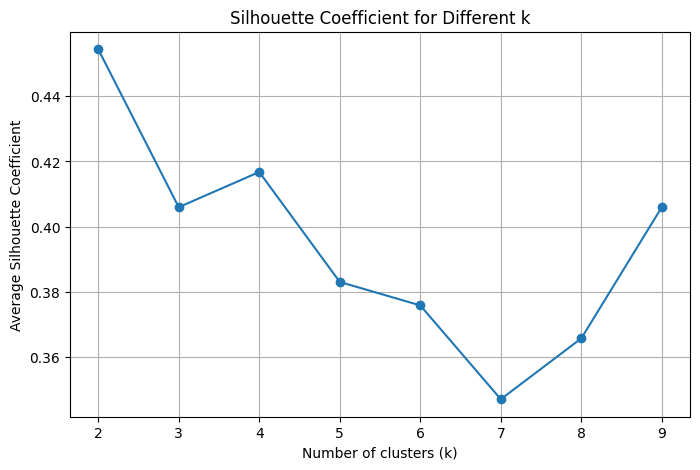

In [151]:
# Memplot hasil
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.title("Silhouette Coefficient for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Silhouette Coefficient")
plt.grid()

In [152]:
#Penentuan K Optimal dengan Calinski–Harabasz Index
# Rentang nilai k
range_n_clusters =range(2,10)
ch_indices =[]

# Menghitung Calinski–Harabasz Index untuk setiap k
for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  labels = kmeans.fit_predict(X)
  ch_index = calinski_harabasz_score(X, labels)
  ch_indices.append(ch_index)
  print(f'Jumlah cluster: {n_clusters}, Calinski–Harabasz Index: {ch_index:.3f}')

# interpretasi: paling tinggi nya di jumlah klaster nya 9 dan 2
# memilih jumlah klaster 2 karena lebih sesuai

Jumlah cluster: 2, Calinski–Harabasz Index: 45.523
Jumlah cluster: 3, Calinski–Harabasz Index: 31.527
Jumlah cluster: 4, Calinski–Harabasz Index: 37.284
Jumlah cluster: 5, Calinski–Harabasz Index: 38.240
Jumlah cluster: 6, Calinski–Harabasz Index: 43.079
Jumlah cluster: 7, Calinski–Harabasz Index: 37.898
Jumlah cluster: 8, Calinski–Harabasz Index: 43.907
Jumlah cluster: 9, Calinski–Harabasz Index: 52.157


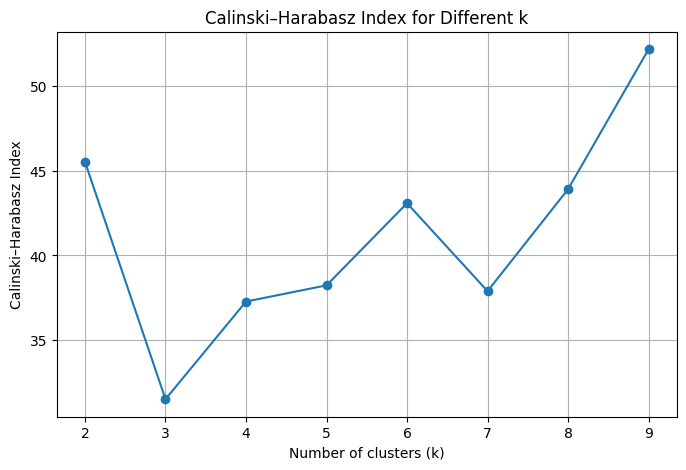

In [153]:
 #Memplot hasil
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, ch_indices, marker='o')
plt.title("Calinski–Harabasz Index for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski–Harabasz Index")
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [154]:
# Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
print("Label Klaster:",labels)
centroids = kmeans.cluster_centers_
print("Centroid masing-masing klaster:",centroids)

# ini juga menggambarkan rata-rata tiap variabel di tiap2 klaster nya
# Karakter utama klaster 0: Parkir Liar Tinggi, Arus Lalu Lintas Tinggi, Permasalahan Jalan Sangat Tinggi
# Karakter utama klaster 1: Parkir Liar Rendah–Sedang, Arus Lalu Lintas Rendah, Permasalahan Jalan Rendah–Sedang

Label Klaster: [1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 1 1 1 0 1 1]
Centroid masing-masing klaster: [[608.72727273 221.54545455 830.18181818]
 [261.81818182  95.45454545 337.45454545]]


In [155]:
# Hitung jarak setiap data ke centroid masing-masing
distances_to_centroid = np.linalg.norm(X - centroids[labels], axis=1)
# Tampilkan jarak ke centroid
df_centroid_dist = pd.DataFrame({'Cluster': labels, 'Jarak ke Centroid': distances_to_centroid})
print("Jarak ke Centroid:")
display(df_centroid_dist)

Jarak ke Centroid:


,Cluster,Jarak ke Centroid
0,1,78.793694
1,0,120.692492
2,1,246.264069
3,1,394.512001
4,0,292.611976
5,1,34.663196
6,1,446.928803
7,0,161.979644
8,1,311.979736
9,1,169.229782


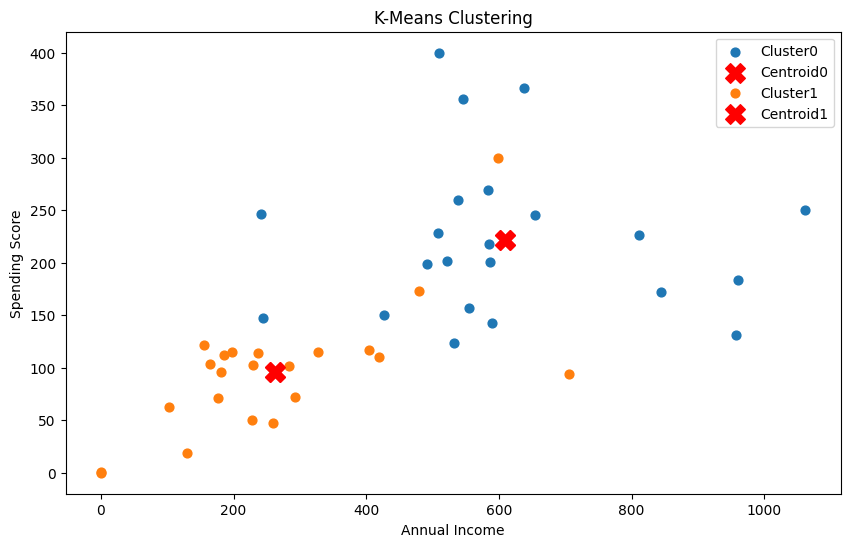

In [156]:
# Visualisasi hasil Clustering
plt.figure(figsize=(10,6))
X=data.iloc[:,2:].values
for i in range(kmeans.n_clusters):
   plt.scatter(X[kmeans.labels_==i,0],X[kmeans.labels_==i,1],s=40,label='Cluster'+str(i))
   plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroid'+str(i))
   plt.title('K-Means Clustering')
   plt.xlabel('Annual Income')
   plt.ylabel('Spending Score')
   plt.legend()
   plt.grid()

# interpretasi: hasil visualisasinya mirip dgn ward linkage

In [157]:
#Silhouette Coefficient
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

np.float64(0.4543947530434776)

In [158]:
# Calinski–Harabasz Index
ch_index = calinski_harabasz_score(X, labels)
ch_index

# ditentukan nya berdasarkan critical thingking (konteks data nya saja)

np.float64(45.52250084677963)

In [159]:
# Menghitung jumlah titik dalam setiap cluster
# ada brp member/ orang / pelanggan di tiap klaster nya
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
cluster_counts

# interpretasi:
# klaster 0: 22 kecamatan, klaster 1: 22 kecamatan

{np.int32(0): np.int64(22), np.int32(1): np.int64(22)}

Text(0, 0.5, 'Jumlah Anggota')

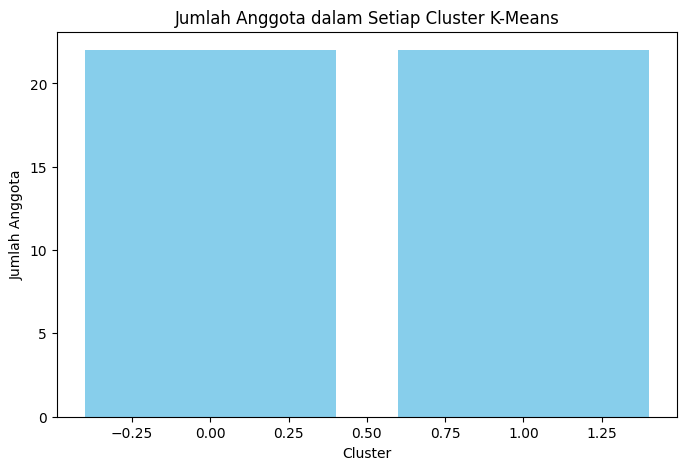

In [160]:
# Memplot diagram batang
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.keys(), cluster_counts.values(), color='skyblue')
plt.title("Jumlah Anggota dalam Setiap Cluster K-Means")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")

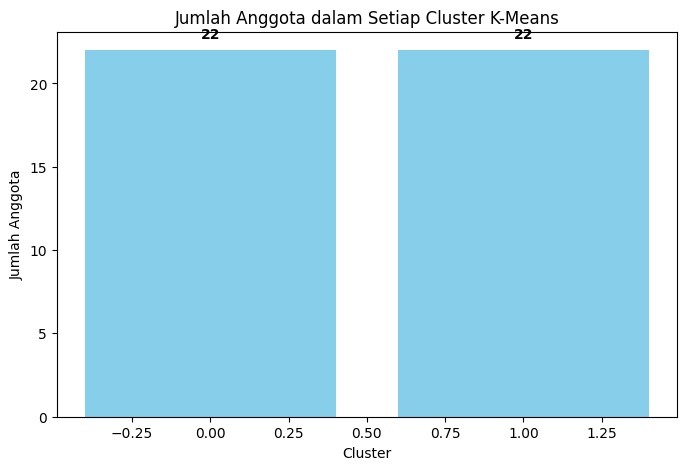

In [161]:
# Memplot diagram batang
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.keys(), cluster_counts.values(), color='skyblue')

plt.title("Jumlah Anggota dalam Setiap Cluster K-Means")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")

# Menambahkan angka di atas batang
for i, value in enumerate(cluster_counts.values()):
    plt.text(
        i,                         # posisi x
        value + 0.5,               # posisi y (sedikit di atas batang)
        str(value),                # angka yang ditampilkan
        ha='center',               # horizontal alignment
        va='bottom',               # vertical alignment
        fontsize=10,               # ukuran font
        fontweight='bold'
    )
plt.show()

## **Kecamatan hasil K-Means Clustering**

In [162]:
# Menambahkan kolom cluster ke data asli
data['Cluster'] = labels

In [163]:
# Kecamatan di Cluster 0
cluster_0 = data[data['Cluster'] == 0][['Kecamatan DKI Jakarta', 'Cluster']]
print("\nDaftar Kecamatan di Cluster 0:")
display(cluster_0)



Daftar Kecamatan di Cluster 0:


,Kecamatan DKI Jakarta,Cluster
1,KECAMATAN GAMBIR,0
4,KECAMATAN MENTENG,0
7,KECAMATAN TANAH ABANG,0
12,KECAMATAN PENJARINGAN,0
13,KECAMATAN TANJUNG PRIOK,0
14,KECAMATAN CENGKARENG,0
15,KECAMATAN GROGOL PETAMBURAN,0
17,KECAMATAN KEBUN JERUK,0
18,KECAMATAN KEMBANGAN,0
21,KECAMATAN TAMBORA,0


In [164]:
# Kecamatan di Cluster 1
cluster_1 = data[data['Cluster'] == 1][['Kecamatan DKI Jakarta', 'Cluster']]
print("\nDaftar Kecamatan di Cluster 1:")
display(cluster_1)



Daftar Kecamatan di Cluster 1:


,Kecamatan DKI Jakarta,Cluster
0,KECAMATAN CEMPAKA PUTIH,1
2,KECAMATAN JOHAR BARU,1
3,KECAMATAN KEMAYORAN,1
5,KECAMATAN SAWAH BESAR,1
6,KECAMATAN SENEN,1
8,KECAMATAN CILINCING,1
9,KECAMATAN KELAPA GADING,1
10,KECAMATAN KOJA,1
11,KECAMATAN PADEMANGAN,1
16,KECAMATAN KALIDERES,1


In [165]:
print("\nJumlah anggota tiap klaster:")
print(data['Cluster'].value_counts())


Jumlah anggota tiap klaster:
Cluster
1    22
0    22
Name: count, dtype: int64
